## KNN con python e scikit-learn

[cosa sono gli scikits](https://svn.scipy.org/scikits.html)<br>
[scikit-learn FAQ](https://scikit-learn.org/stable/faq.html)<br>
[introduzione a scikit-learn: guiding principles and basics](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)<br>
[sviluppare stimatori con l'API di scikit-learn](https://scikit-learn.org/stable/developers/develop.html)<br>
[tutorial su statistical learning con scikit-learn](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html)<br>
[supervised learning con scikit-learn](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

In [1]:
import numpy as np
from sklearn import datasets              # sklearn is part of scikit-learn (so 46113732)
from sklearn.datasets import load_iris
iris = load_iris()                        # è un oggetto scikit-learn, inclusivo di documentazione. Non è ancora un df pandas.
print(iris.data)                          # le variabili di previsione,
                                          # aka, feature, predittori, variabili indipendenti, dimensioni, assi di analisi, colonne, 
                                            #attributi
print(type(iris.data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Vediamo ora la validazione del modello: il modo sbagliato ed il modo giusto 
[(fonte)](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html).

### il modo sbagliato

In [2]:
from sklearn.neighbors import KNeighborsClassifier # il classificatore knn
model = KNeighborsClassifier(n_neighbors=1)        # costruzione con k=1 dell'oggetto (in knn NON c'è un modello 
                                                   # in senso stretto)
model

KNeighborsClassifier(n_neighbors=1)

In [3]:
X = iris.data
y = iris.target

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
from sklearn import metrics                        # le metriche per valutare la capacità predittiva degli algoritmi

In [6]:
model.fit(X,y)
y_pred = model.predict(X)                          # la pseudo-previsione dei nuovi valori

In [7]:
metrics.accuracy_score(y,y_pred)                   # come è possibile? un modello che prevede sempre correttamente?
                                                   # errore di fondo (concettuale): training e valutazione sullo stesso dataset.
                                                   # [inoltre knn è instance-based, il fit semplicemente memorizza i dati di
                                                   # training, e la predict confronta i nuovi dati con questi: salvo casi 
                                                   # particolari l'accuratezza risulta così del 100%]

1.0

[metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

### il modo giusto
Serve un dataset dedicato alla valutazione dell'algoritmo, chiamato in vari modi:
* **test** dataset
* **validation** dataset
* hold-out dataset
* out-of-sample dataset
* new, unseen dataset
* "designated in advance dataset (ISLR)"

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [9]:
type(X_train) # scikit-learn lavora (come input) con array NUMERICHE numpy o matrici NUMERICHE SPARSE di scipy

numpy.ndarray

In [10]:
X_train.shape

(105, 4)

In [11]:
X_test.shape

(45, 4)

In [12]:
y_train.shape

(105,)

In [13]:
y_test.shape

(45,)

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=3) # costruzione di un classificatore 1-NN (vuoto, senza ancora i dati).
                                                     # è il famoso metodo COSTRUTTORE che, per ogni classe OO, crea la 
                                                     # nuova istanza (oggetto).
                                                     # k è l'iper-parametro (cioè il parametro di tuning);
                                                     # più esattamente, l'iper-parametro è N/k (ESL, p. 15)
                
# "Objects in python are created by calling a special type of method in the class known as a constructor."<br>

In [15]:
knn_classifier

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_classifier.fit(X_train,y_train) # store dei dati di training (knn è un metodo non-parametrico instance-based)
                                    # è una pseudo-fit, per rispettare la struttura fit-predict-transform di scikit-learn.
    
                                    #######################################################################################
                                    # The training phase of the algorithm consists only of storing the feature vectors    #
                                    # and class labels of the training samples.                                           #
                                    #######################################################################################                                       

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn_classifier.predict(X_test) # la previsione dei nuovi valori

In [18]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [19]:
print("Accuratezza: ", np.round_(metrics.accuracy_score(y_test,y_pred),2)) # confronto le risposte effettive (actual) vs quelle previste

Accuratezza:  0.98


In [20]:
# VERE previsioni con i dati di 3 NUOVI fiori iris:
sample_data = [[5,5,3,2],[2,4,3,5],[3,4,4,4]] # una lista
print(type(sample_data))
print(sample_data)

<class 'list'>
[[5, 5, 3, 2], [2, 4, 3, 5], [3, 4, 4, 4]]


In [21]:
new_preds = knn_classifier.predict(sample_data) # questo ogetto knn è stato costruito sul dataset di training;
                                                # in realtà, l'uso più comune è quello, una volta accertata l'accuratezza
                                                # del metodo sul test set, di RICOMPORRE il training e test set e RIESEGUIRE
                                                # il fit sul dataset COMPLETO, allo scopo di utilizzare il maggior numero
                                                # possibile di righe. 
print(new_preds) # le tre classi previste

[1 2 2]


In [22]:
# rendiamole più leggibili:
pred_species = [iris.target_names[p] for p in new_preds] # "list comprehension" (alternativo ad una for)
pred_species

['versicolor', 'virginica', 'virginica']

In [23]:
for p in new_preds:                     # ciclo classico (alternativo alla list comprehension)
    print(iris.target_names[p])

versicolor
virginica
virginica


In [24]:
# per problemi di classificazione multi-classe (k>2, dove qui k è il numero di classi della risposta e NON la dimensione
# del vicinato):
# - alcuni algoritmi di ML (knn, SVM, ecc) usano lo schema One vs All (OVA), aka One vs Rest (OvR), che permette di costruire 
#   solo k classificatori OvA (uno per classe, detta "classe di interesse", che è la classe positiva, mentre tutte le altre sono
#   considerate negative) anzichè costruire (k over 2) classificatori binari;
# - altri metodi di ML, invece, forniscono di loro (nativamente) le probabilità delle varie singole classi (ad es. LDA o 
#   Naive Bayes)

![One vs All](images_knn/OvA.png) 

In [25]:
# e le probabilità? tutti i metodi di classificazione di scikit-learn hanno il metodo 'predict_proba' per la 
# 'probabilistic classification'
print(knn_classifier.predict_proba(X_test)[0:10,0])
print(knn_classifier.predict_proba(X_test)[0:10,1])
print(knn_classifier.predict_proba(X_test)[0:10,2])

[1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
[0.         1.         1.         0.         0.         0.66666667
 0.         0.         0.         0.        ]
[0.         0.         0.         0.         1.         0.33333333
 1.         0.         0.         1.        ]


In [26]:
print(knn_classifier.predict_proba(X_test)[5,0])
print(knn_classifier.predict_proba(X_test)[5,1])
print(knn_classifier.predict_proba(X_test)[5,2])

0.0
0.6666666666666666
0.3333333333333333


In [27]:
print(knn_classifier.predict(X_test)[5])

1


[esempio istruttivo](https://stackoverflow.com/questions/37089177/probability-prediction-method-of-kneighborsclassifier-returns-only-0-and-1)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, algorithm='ball_tree', metric='euclidean') # k=25 (cioè aumento la dimensione
                                                                                      # del vicinato)
knn.fit(X_train, y_train)

print(knn.predict_proba(X_test)[:,:])

[[1.   0.   0.  ]
 [0.2  0.76 0.04]
 [0.   0.76 0.24]
 [1.   0.   0.  ]
 [0.   0.04 0.96]
 [0.   0.56 0.44]
 [0.   0.16 0.84]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.04 0.96]
 [0.   0.88 0.12]
 [1.   0.   0.  ]
 [0.   0.04 0.96]
 [0.   0.68 0.32]
 [0.   0.76 0.24]
 [1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.64 0.36]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.88 0.12]
 [0.   0.64 0.36]
 [0.   0.36 0.64]
 [1.   0.   0.  ]
 [0.   0.04 0.96]
 [0.   0.88 0.12]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.76 0.24]
 [0.   0.24 0.76]
 [0.   0.76 0.24]
 [0.   0.04 0.96]
 [0.   0.96 0.04]
 [0.   0.04 0.96]
 [0.   0.12 0.88]
 [1.   0.   0.  ]
 [0.   0.96 0.04]
 [1.   0.   0.  ]
 [0.   0.68 0.32]
 [0.   0.16 0.84]
 [0.   0.04 0.96]
 [1.   0.   0.  ]
 [0.   0.44 0.56]
 [0.   0.08 0.92]
 [0.   0.68 0.32]]


In [29]:
knn.params_                                  # un metodo NON-parametrico, come appunto il knn, per definizione 
                                             # NON ha parametri

AttributeError: 'KNeighborsClassifier' object has no attribute 'params_'

## Dati di input agli stimatori di scikit-learn

In [30]:
import pandas as pd
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= list(iris['feature_names']) + ['target'])
type(df)
                     # come già visto prima:
                     # "To convert a scikit-learn dataset to a pandas dataset you can use the pd.DataFrame constructor, giving
                     # a numpy array (data) and a list of the names of the columns (columns). To have everything in one 
                     # DataFrame, you can concatenate the features and the target into one numpy array with np.c_[...] 
                     # (note the []).

pandas.core.frame.DataFrame

In [31]:
# cambiamo i nomi delle variabili (senza i cm) - con 'inplace=True'
df.rename(columns={'sepal length (cm)': 'sepal length', 'sepal width (cm)': 'sepal width','petal length (cm)': 'petal length','petal width (cm)': 'petal width'},inplace=True)

In [32]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [33]:
# dalla cella di sopra (codice completo, con anche le import necessarie - questa volta senza lo split train/test):
from sklearn.model_selection import train_test_split
X = df[['sepal length', 'sepal width','petal length','petal width']]     # anzichè iris.data dell'oggetto 'bunch'
y = iris.target  
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3) 
knn_classifier.fit(X,y)
new_sample_data = [[1,2,3,4],[2,4,1,6],[4,2,1,3]] # una nuova lista
new_preds = knn_classifier.predict(new_sample_data)
print(new_preds)

[1 0 0]


In [34]:
y = df['target']  # anzichè iris.target dell'oggetto 'bunch'
knn_classifier = KNeighborsClassifier(n_neighbors=3) 
knn_classifier.fit(X,y) 

KNeighborsClassifier(n_neighbors=3)

In [37]:
# nb. se INVECE (erroneamente): 
y = np.ravel(df[['target']])                 # un dataframe convertito in un vettore 1D (senza 'ravel' c'è un warning)
print(type(df[['target']]))
knn_classifier = KNeighborsClassifier(n_neighbors=3) 
knn_classifier.fit(X,y)            # errore! ("A column-vector y was passed when a 1d array was expected")

<class 'pandas.core.frame.DataFrame'>


KNeighborsClassifier(n_neighbors=3)

## Persistenza del modello

In [38]:
from sklearn.externals import joblib  # funzione deprecata

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Utente\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [39]:
import joblib  # so: 61893719 

               # In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), 
               # which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted 
               # scikit-learn estimators.

In [40]:
joblib.dump(knn_classifier,'classificatore_knn.joblib')

['classificatore_knn.joblib']

In [41]:
del knn_classifier # cancellazione del classificatore
import gc
gc.collect() # quando è lecito fare la garbage collection? (so: 478167)
             # con i big data, altrimenti non è necessario (DMforBA, p. 45).

16

In [42]:
knn_classifier.predict(sample_data)  # --> oggetto inesistente, ora

NameError: name 'knn_classifier' is not defined

In [43]:
knn_classifier = joblib.load('classificatore_knn.joblib') # load dell'oggetto

In [44]:
knn_classifier.predict(sample_data)

array([0., 2., 2.])

## KNN: esempio più complesso 

Knn è un metodo non-parametrico;<br>

non ci sono assunzioni sulla forma della relazione Y = f(X-vec);<br>

non si stimano i parametri;<br>

punto chiave: che tipo di 'distanza' tra punti si usa? euclidea, manhattan, ecc;<br>

aka, instance-based learning.<br>

funziona bene quando il Decision Boundary è frastagliato, perchè kNN è sensibile alla struttura locale.<br>

come tutti i metodi non-parametrici soffre della curse of multi-dimensionality (ISLR, p. 168).

In [45]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score       # solo questa metrica, adesso
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt


### Esame dei dati

In [46]:
# caricamento dei dati
mower_df = pd.read_csv('data_knn/RidingMowers.csv')
type(mower_df)

pandas.core.frame.DataFrame

In [47]:
mower_df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [48]:
# note su .csv in excel in generale:
# - l'apertura di un file .csv da excel toglie gli zeri davanti, il che corrompe i CAP;
# - il salvataggio di un file .csv da excel salva solo le cifre che sono in quel momento visualizzate; se è necessaria una 
#   certa precisione decimale, occorre verificare che essa sia effettiva prima di salvare il file. 

In [49]:
mower_df.head(9)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner


In [50]:
mower_df.index

RangeIndex(start=0, stop=24, step=1)

In [51]:
mower_df['Number'] = mower_df.index + 1 # colonna aggiuntiva (con numerazione "europea") per il plot successivo
mower_df

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5
5,110.1,19.2,Owner,6
6,108.0,17.6,Owner,7
7,82.8,22.4,Owner,8
8,69.0,20.0,Owner,9
9,93.0,20.8,Owner,10


In [52]:
mower_df.isna() 

,Income,Lot_Size,Ownership,Number
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [53]:
mower_df.isna().sum()

Income       0
Lot_Size     0
Ownership    0
Number       0
dtype: int64

In [54]:
mower_df.iloc[:,0:2].corr().round(2) # le correlazioni tra variabili numeriche (DMforBA, p. 104 top)

,Income,Lot_Size
Income,1.00,0.17
Lot_Size,0.17,1.00


In [55]:
type(mower_df['Ownership'])

pandas.core.series.Series

In [56]:
# altri esempi e maggiori dettagli sull'importante funzione 'train_test_split'.
# creiamo un semplice dataset di prova.
import numpy as np
X, y = np.arange(10).reshape((5, 2)), range(5) # la funzione 'range' crea un vettore ma non ha il metodo reshape.
                                               # per questo, serve la funzione 'arange' di numpy
print(X)
print(list(y))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(  
...     X, y, test_size=0.33, random_state=1)  # ... --> linea continua a capo

In [58]:
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: ",y_train)
print("y_test: ",y_test)

X_train: 
 [[8 9]
 [0 1]
 [6 7]]
X_test: 
 [[4 5]
 [2 3]]
y_train:  [4, 0, 3]
y_test:  [2, 1]


In [59]:
type(X_train) # gli input sono qui delle array n-dimensionali di numpy

numpy.ndarray

In [60]:
# ora, lo split per il dataset mower_df [funziona anche questa sintassi, 2 output anzichè 4]:
trainData, validData = train_test_split(mower_df, test_size=0.33, random_state=1)
print("trainData: \n",trainData,"\n validData: \n",validData)

trainData: 
     Income  Lot_Size Ownership  Number
2     64.8      21.6     Owner       3
19    66.0      18.4  Nonowner      20
6    108.0      17.6     Owner       7
7     82.8      22.4     Owner       8
21    33.0      18.8  Nonowner      22
1     85.5      16.8     Owner       2
16    84.0      17.6  Nonowner      17
0     60.0      18.4     Owner       1
15    43.2      20.4  Nonowner      16
23    63.0      14.8  Nonowner      24
22    51.0      14.0  Nonowner      23
9     93.0      20.8     Owner      10
8     69.0      20.0     Owner       9
12    75.0      19.6  Nonowner      13
11    81.0      20.0     Owner      12
5    110.1      19.2     Owner       6 
 validData: 
     Income  Lot_Size Ownership  Number
13    52.8      20.8  Nonowner      14
18    59.4      16.0  Nonowner      19
3     61.5      20.8     Owner       4
14    64.8      17.2  Nonowner      15
20    47.4      16.4  Nonowner      21
17    49.2      17.6  Nonowner      18
10    51.0      22.0     Owner      

In [61]:
print(trainData.shape, validData.shape)

(16, 4) (8, 4)


In [62]:
print(len(trainData),len(validData)) # le due prime dimensioni ("Return the number of items in a container.")

16 8


In [63]:
type(trainData) # un df di pandas, perchè l'input era un df di pandas

pandas.core.frame.DataFrame

In [64]:
newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}]) # i NUOVI valori delle feature delle osservazioni da prevedere
                                                              # come Y (ownership)
newHousehold

,Income,Lot_Size
0,60,20


<AxesSubplot:xlabel='Income', ylabel='Lot_Size'>

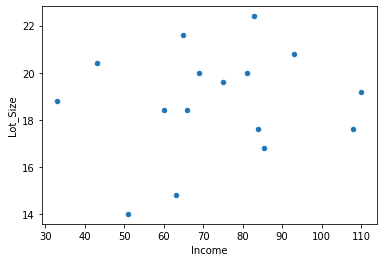

In [65]:
# scatter plot (con pandas: 'trainData è infatti un df pandas')
trainData.plot.scatter(x=0,y=1) # le colonne (per l'asse x e l'asse y) sono indicate con l'indice (anzichè il nome colonna)

<AxesSubplot:xlabel='Income', ylabel='Lot_Size'>

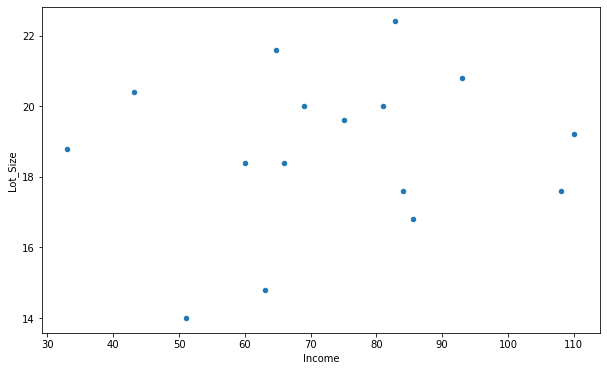

In [66]:
trainData.plot.scatter(x=0,y=1,figsize=(10,6)) # plot ingrandito

In [67]:
# scala logaritmica (naturale), utile spesso per:
# - compattare i valori (che si estendano su vari odg) --> come conseguenza può ridurre gli outlier;
# - gaussianizzarli (necessario per alcuni metodi, ad es. LDA o FA); è l'approccio standard (ce ne sono altri);
# - rilevare le relazioni lineari;
# - risposta eteroschedastica (ISLR, p. 95)
# Nel ML spesso i dati sono assimmetrici (skewed), per la natura del fenomeno in sè (ad es. Income o Durata attività) 
# oppure per la combinazione di: a) assenza di valori negativi e b) pochi valori positivi estremi.  
# Attenzione: con il log, la moltiplicazione diventa addizione [log (b*c) = log(b) + log(c). 

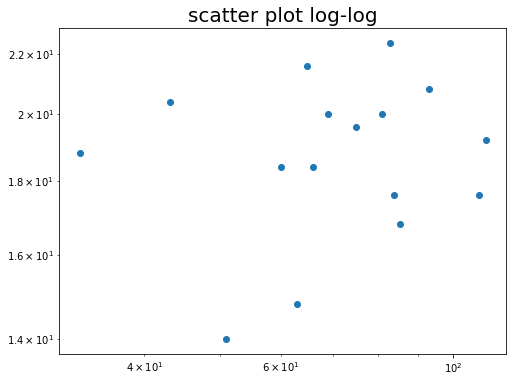

In [68]:
import matplotlib.pylab as plt # per i log serve matplotlib
fig = plt.figure(figsize=(8, 6))
plt.scatter(trainData['Income'],trainData['Lot_Size'])
plt.xscale("log")
plt.yscale("log")
plt.title("scatter plot log-log",fontsize=20)
plt.show()

<AxesSubplot:>

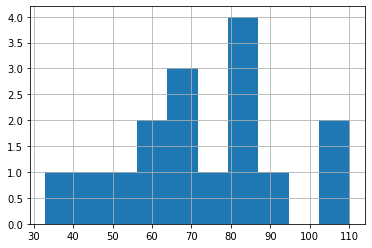

In [69]:
# l'istogramma di Income (con pandas, nuovamente)
trainData.Income.hist()

<AxesSubplot:>

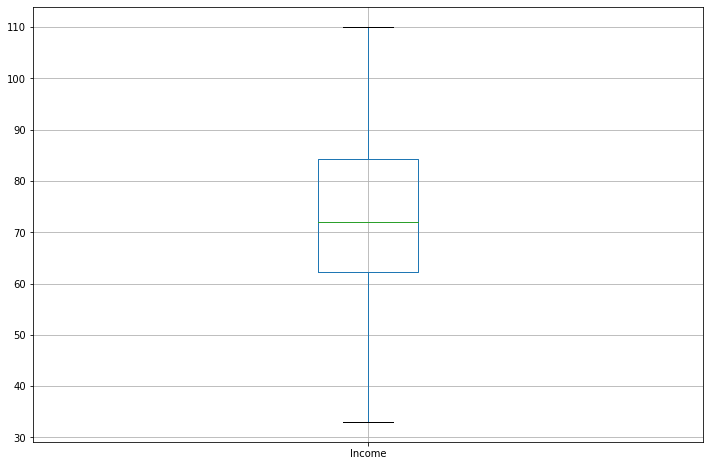

In [70]:
trainData.boxplot(column='Income',figsize=[12,8]) # sempre con pandas

### Grafica con pandas / python (a prescindere da knn)

[Un'introduzione al plotting con pandas](https://neptune.ai/blog/pandas-plot-deep-dive-into-plotting-directly-with-pandas)

[Lollipop chart con python](https://www.analyticsvidhya.com/blog/2021/06/lollipop-charts-advanced-data-visualization-in-python/)

### Standardizzazione dei dati

In [71]:
scaler = preprocessing.StandardScaler()       # usiamo qui uno standardizzatore che usa la estimator API;
                                              # 'preprocessing.scale', usato nel primo nb, non la usava (era una funzione);
                                              # vedi 'help di 'StandardScaler'.

[StandardScaler vs scale](https://stackoverflow.com/questions/46257627/scikit-learn-preprocessing-scale-vs-preprocessing-standardscalar/46258260)

In [72]:
scaler.fit(trainData[['Income', 'Lot_Size']]) # Compute the mean and std-dev to be used for LATER scaling.
                                              # Sono la media e la std-dev dei dati di training.
                                              # 'fit' è un tipico metodo della estimator API di scikit-learn.
 
# Da ISLR e DMforBA:
# Standardize features by removing the mean and scaling to unit variance. So, all variables are on a comparable scale.
# With standardization, we are expressing each value as the number of SD away from the mean (aka, z-score).

# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False (ie, not centered data),
# and s is the standard deviation of the training samples or one if with_std=False.

scaler

##########################################################################################################################
# --> Alcuni metodi di ML sono sensibili allo scaling (Regressione penalizzata, PCA, Clustering, ecc), cioè producono    # 
#     risultati differenti se i dati sono riscalati; per i CART è consigliabile. Altri metodi sono insensibili           #
#     (Regressione Lineare OLS, nella quale la moltiplicazione di Xj per la costante c semplicemente riscala i           #
#     coefficienti stimati di 1/c, sicchè il prodotto Xj*BetaJ rimane costante).                                         #
#     la regola del pollice, con i primi, è di riscalare i dati se le unità di misura delle variabili sono differenti.   #
#     Se le unità di misura sono le stesse, o se la scala riflette l'importanza, non si standardizzano i dati, invece.   #
#     Per precauzione si può riscalare sempre i dati.                                                                    #
##########################################################################################################################

StandardScaler()

In [73]:
# Transform the full dataset
mowerStd = pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income', 'Lot_Size']]), # concateno le prime due colonne                                                             
    columns=['zIncome', 'zLot_Size']),                                                 # (standardizzate) con le ultime due; 
                                                                                       # la 'transform' utiliza mean/std 
                                                                                       # calcolati prima dalla 'fit';
                                                                                       # la 'transform' è un tipico metodo della
                                                                                       # estimator API di scikit-learn;
                                                                                       # z sta per normalizzato.
    mower_df[['Ownership', 'Number']]], axis=1)                                        # 'axis' = 1 (concateno colonne)
mowerStd

,zIncome,zLot_Size,Ownership,Number
0,-0.634098,-0.170642,Owner,1
1,0.601394,-0.898714,Owner,2
2,-0.401535,1.285503,Owner,3
3,-0.561422,0.921467,Owner,4
4,0.674070,2.195593,Owner,5
5,1.793280,0.193394,Owner,6
6,1.691534,-0.534678,Owner,7
7,0.470577,1.649539,Owner,8
8,-0.198042,0.557430,Owner,9
9,0.964774,0.921467,Owner,10


In [74]:
preprocessing.scale(mower_df[['Income', 'Lot_Size']]) # standardizzazione con la funzione del primo nb.
                                                      # differenti!!

array([[-0.43545243, -0.23136968],
       [ 0.88058157, -0.9044451 ],
       [-0.18772838,  1.11478117],
       [-0.35803866,  0.77824346],
       [ 0.95799534,  1.95612545],
       [ 2.15016731,  0.10516804],
       [ 2.04178804, -0.56790739],
       [ 0.7412368 ,  1.45131888],
       [ 0.02903016,  0.44170575],
       [ 1.26765039,  0.77824346],
       [-0.89993501,  1.28305003],
       [ 0.64834028,  0.44170575],
       [ 0.33868522,  0.27343689],
       [-0.80703849,  0.77824346],
       [-0.18772838, -0.73617625],
       [-1.30248659,  0.6099746 ],
       [ 0.80316781, -0.56790739],
       [-0.99283153, -0.56790739],
       [-0.46641793, -1.24098281],
       [-0.12579737, -0.23136968],
       [-1.08572805, -1.07271396],
       [-1.82890019, -0.06310082],
       [-0.89993501, -2.08232709],
       [-0.2806249 , -1.74578938]])

### Creazione dei dataset

In [75]:
trainStd = mowerStd.iloc[trainData.index] # prendo gli indici del dataset di training originari e li uso per estrarre 
                                          # un subset dei dati standardizzati.
                     
validStd = mowerStd.iloc[validData.index] # la stessa operazione

newHouseholdStd = pd.DataFrame(scaler.transform(newHousehold), columns=['zIncome', 'zLot_Size'])
                                          # la 'transform' utiliza mean/std-dev calcolati prima dalla 'fit'

newHouseholdStd                           # x0

,zIncome,zLot_Size
0,-0.634098,0.55743


### Applicazione del kNN

In [76]:
knn = NearestNeighbors(n_neighbors=3)  # step 1) costruzione dell'oggetto
                                       # 'metric'=minkowski con p=2 --> distanza euclidea.
                                       # la distanza euclidea è la più frequente nel knn ed è computazionalmente veloce.
                                       # k esprime la regola di classificazione.
                                       # k=1 è la scelta più semplice --> il vicinato ad X0 è semplicemente il punto più vicino.
                                       
                                       # knn, ancorchè semplice ed intuitivo, è molto efficace quando il training set è grande.
                                       # knn è il miglior classificatore in un caso su tre (Hastie & Tibshirani).
                                       # l'errore di classificazione del knn è al massimo due volte di quello se si conoscono
                                       # le PDF delle classi (cioè le PDF congiunte condizionate ad ogni classe). Teorema.
                                                      


[Distanza di Minkowski](https://it.wikipedia.org/wiki/Distanza_di_Minkowski#:~:text=In%20matematica%2C%20la%20distanza%20di,sia%20della%20distanza%20di%20Manhattan.) 

In [77]:
knn.fit(trainStd[['zIncome', 'zLot_Size']])           # step 2) "fit" (nel knn è solo uno store dei dati training)

distances, indices = knn.kneighbors(newHouseholdStd)  # step 3) previsione per nuovi dati (x0).
                                                      # "the method kneighbors finds the K-neighbors of a point. Returns indices
                                                      # of and distances to the neighbors of each point.""
                                                      # è solo ora che knn lavora (algoritmo lazy!)

print(np.round(distances,2))                          # la distanza dei 3 punti del "vicinato" dal punto x0 (k=3).
                                                      # [gli altri punti del dataset hanno distanze da X0 maggiori].
print(indices)                                        # Gli indici dei punti del vicinato.
print(trainStd.index)

[[0.44 0.73 0.75]]
[[12  7 13]]
Int64Index([2, 19, 6, 7, 21, 1, 16, 0, 15, 23, 22, 9, 8, 12, 11, 5], dtype='int64')


In [78]:
# verifichiamo ora che il vicinato ad X0 sia effettivamente tale!
# servono 6 passi.

# 1. creiamo un df pandas con tutte le osservazioni di training ed X0:
df_concat = pd.concat([trainStd[['zIncome', 'zLot_Size']],newHouseholdStd],axis=0) 
                                                   # combina la colonna 1 dei casi 5 e 6 con la colonna 4 dei medesimi casi.
                                                   # 'axis' specifica la dimensione lungo la quale la concatenazione avviene.
                                                   # 0 righe - 1 colonne.

In [79]:
df_concat                                          # le righe di training ed al fondo la riga nuova

,zIncome,zLot_Size
2,-0.401535,1.285503
19,-0.343394,-0.170642
6,1.691534,-0.534678
7,0.470577,1.649539
21,-1.942266,0.011376
1,0.601394,-0.898714
16,0.528718,-0.534678
0,-0.634098,-0.170642
15,-1.448069,0.739448
23,-0.488746,-1.808805


In [80]:
# verifichiamo ora che il vicinato ad X0 sia effettivamente tale!
# passi 2-6

# 2. pre-conversione di formato
X = df_concat[['zIncome', 'zLot_Size']].to_numpy() # la funxione 'dist.pairwise' (vedi step 3.) richiede un'array np.
                                                   # serve la conversione da pandas df a numpy array.
                                                   # '.to_numpy' converts specific columns of pandas df to numpy array 
                                                   # (so 13187778).

# 3. calcoliamo la matrice delle distanze:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

dist = dist.pairwise(X)            # la matrice delle distanze (euclidee) tra le osservazioni dell'array df_concat.
                                   # "'dist_pairwise' computes the pairwise distances between X (and Y). This is a 
                                   # convenience routine for the sake of testing."

# 4. teniamo solo la matrice traingolare superiore (per chiarezza)
dist_lower = np.tril(dist)

# 5. con screen grandi si può aumentare l'ampiezza di linea per avere output più chiari:
np.set_printoptions(linewidth=110) # so 21971449, 37149933.

# 6. visualizziamola (con le sue dimensioni):
print(np.round(dist_lower,2),)
                                         # X0 è l'ultima riga.
                                         # le tre distanze minori sono appunto 13,8,14 (in ordine crescente)
                                         #                        (con n-1 --> 12,7,13)
            
print(dist_lower.shape)                  # trainStd era 16x4, abbiamo aggiunto X0

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.46 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [2.77 2.07 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.95 1.99 2.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [2.   1.61 3.67 2.92 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [2.4  1.19 1.15 2.55 2.7  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [2.04 0.95 1.16 2.18 2.53 0.37 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.47 0.29 2.35 2.13 1.32 1.43 1.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.18 1.43 3.39 2.12 0.88 2.62 2.35 1.22 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [3.1  1.64 2.53 3.59 2.33 1.42 1.63 1.64 2.72 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [3.52 2.13 3.21 4.12 2.35 2.1  2.29 2.05 2.94 0.69 0.   0.   0.   0.   0.   0.   0.  ]
 [1.41 1.7  1.63 0.88 3.05 1.86 

In [81]:
# nella suddetta matrice delle distanze, nella riga di X0 (l'ultima), il QUARTO valore crescente è 0.76, alla posizione 1 
# (indice 0).
# verifichiamolo con k=4 (con lo stesso codice di prima): 
knn = NearestNeighbors(n_neighbors=4) 
knn.fit(trainStd[['zIncome', 'zLot_Size']])           
distances, indices = knn.kneighbors(newHouseholdStd)  
print(np.round(distances,2))                                      
                                                     
print(indices)                                        
print(trainStd.index)

[[0.44 0.73 0.75 0.76]]
[[12  7 13  0]]
Int64Index([2, 19, 6, 7, 21, 1, 16, 0, 15, 23, 22, 9, 8, 12, 11, 5], dtype='int64')


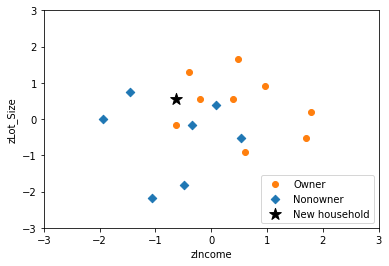

In [82]:
# lo scatter plot dei punti del training set e di X0 (con pandas).
def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.zIncome, subset.zLot_Size, marker='o', label='Owner' if showLabel else None, color='C1', **kwargs)

    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.zIncome, subset.zLot_Size, marker='D', label='Nonowner' if showLabel else None, color='C0', **kwargs)

    plt.xlabel('zIncome')  # set x-axis label
    plt.ylabel('zLot_Size')  # set y-axis label
    # for _, row in data.iterrows():
    #    ax.annotate(row.Number, (row.zIncome + 2, row.zLot_Size))

fig, ax = plt.subplots()


plotDataset(ax, trainStd)

ax.scatter(newHouseholdStd.zIncome, newHouseholdStd.zLot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('zIncome')  # set x-axis label
plt.ylabel('zLot_Size')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.legend(handles, labels, loc=4)

plt.show()

In [83]:
print(trainStd.iloc[indices[0], :])  # indices (il secondo output di 'knn.kneighbors') is a list of lists, we are only 
                                     # interested in the first element

     zIncome  zLot_Size Ownership  Number
8  -0.198042   0.557430     Owner       9
0  -0.634098  -0.170642     Owner       1
12  0.092662   0.375412  Nonowner      13
2  -0.401535   1.285503     Owner       3


In [84]:
train_X = trainStd[['zIncome', 'zLot_Size']]
train_y = trainStd['Ownership']
valid_X = validStd[['zIncome', 'zLot_Size']]
valid_y = validStd['Ownership']

# Train a classifier for different values of k
results = []
for k in range(1, 15): # k=1,2,...14
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results (a list) to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.875
1    2     0.875
2    3     0.875
3    4     0.750
4    5     0.875
5    6     1.000
6    7     1.000
7    8     1.000
8    9     0.875
9   10     0.875
10  11     0.875
11  12     0.875
12  13     0.875
13  14     0.875


In [85]:
# Retrain with full dataset
mower_X = mowerStd[['zIncome', 'zLot_Size']]
mower_y = mowerStd['Ownership']
knn = KNeighborsClassifier(n_neighbors=6).fit(mower_X, mower_y)
distances, indices = knn.kneighbors(newHouseholdStd)
print(knn.predict(newHouseholdStd))
print('Distances',distances)
print('Indices', indices)
print(mowerStd.iloc[indices[0], :])

['Owner']
Distances [[0.37121978 0.43605598 0.50419739 0.72807232 0.74920667 0.76431337]]
Indices [[ 3  8 13  0 12  2]]
     zIncome  zLot_Size Ownership  Number
3  -0.561422   0.921467     Owner       4
8  -0.198042   0.557430     Owner       9
13 -0.982943   0.921467  Nonowner      14
0  -0.634098  -0.170642     Owner       1
12  0.092662   0.375412  Nonowner      13
2  -0.401535   1.285503     Owner       3


In [86]:
# Dall'importante Teorema di Cover & Hart (1967):
# L'error-rate (1-accuratezza) del classificatore 1-NN non è asintoticamente mai maggiore di due volte il tasso di errore 
# di Bayes. 
# Cioè, il tasso di errore di un classificatore che conosca il Decision Boundary, che cioè conosca le probabilità di classe
# per ogni punto del dominio (detto appunto Bayes Error Rate) costituisce (per due) il limite superiore di 1-NN. 

## La dissimilarità / distanza 

Che distanze sono disponibili con knn? (argomento 'metric')<br>
Dalla documentazione: "The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. <u>See the documentation of *DistanceMetric* for a list of available metrics."</u><br><br>
[Le distanze disponibili](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html)<br><br>
In particolare (per variabili continue):
* Euclidea
* Manhattan   (ad isolati)
* Mahalanobis (quella della gaussiana congiunta, tiene conto delle correlazioni) 


**Segue un estratto dal testo "Applied Multivariate Statistical Analysis (sixth ed.) di Johnson & Wichern - 2014 <u>sulle Misure di similarità</u>:**<br>
![Misure di similarità](images_knn/MisureSimilaritaJW.png) 
![Misure di similarità](images_knn/MisureSimilaritaJW2.png) 
![Misure di similarità](images_knn/MisureSimilaritaJW3.png)
<br>

**Una distanza deve soddisfare alcune proprietà (sempre dal testo di Johnson & Wichern, p. 37):**  
![Proprietà delle distanze](images_knn/ProprietaDistanze.png) 
<br><br>
UltraMetric (una quinta proprietà) vs. Pseudo(Semi)Metric, che non soddisfa la "triangle inequality" (usate nella Text Analytics)
<br><br>

**Breve trattazione del tema similarità / dissimilarità / distanze (prof. Secchi, PoliMI, corso di "Applied Statistics" 2018):**
![Pagina 1](images_knn/DistanzeSecchi.png) 
![Pagina 2](images_knn/DistanzeSecchi2.png) 
![Pagina 3](images_knn/DistanzeSecchi3.png) 
![Pagina 4](images_knn/DistanzeSecchi4.png) 


[C'è anche un libro: "Encyclopedia of distances" della Springer](https://link.springer.com/book/10.1007/978-3-642-30958-8)


## Il Decision Boundary

Come si **plotta** il Decision Boundary?

**L'algoritmo base di plotting** è brevemente descritto in ESL, p. 110 (footnote):<br>
"(For this figure and many similar figures in the book) we compute the decision boundaries by an exhaustive contouring method.
We compute the decision rule on a fine lattice of points, and then use contouring algorithms to compute the boundaries.<br><br>
Di seguito sono forniti alcuni **codici python** che implementano questo algoritmo base (in modi leggermente differenti):

[Plot Python della famosa Figure 2.2 di ESL](https://stackoverflow.com/questions/41138706/recreating-decision-boundary-plot-in-python-with-scikit-learn-and-matplotlib) 

Nel DB le probabilità (per quel punto) delle due classi confinanti sono **uguali (o simili)**.<br>
Sono DB **stimati** tramite il campione. I veri DB non sono quasi mai noti (non è noto il processo generativo dei dati).<br>

In [87]:
# caricamento dei dati iris da internet (UCI Machine Learning)

import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


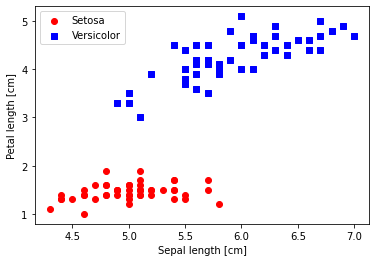

In [88]:
# plot del dataset iris semplificato:
# - solo le due feature 'sepal length' e 'petal length'
# - solo i primi 100 fiori (corrispondenti alle due classi Setosa e Versicolor)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor (i primi 100 fiori)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)       # coding delle due classi (setosa=0, Versicolor=1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')        # plot dei 50 fiori setosa
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')   # plot dei 50 fiori versicolor

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [89]:
# split train/test di X e y (70% di 100 = 70; 30% di 100 = 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

# costruttore di un classificatore 3NN
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# fit sul training set
knn_classifier.fit(X_train,y_train)

# la previsione dei nuovi valori per i fiori di test
y_pred = knn_classifier.predict(X_test) 

In [91]:
# funzione di PLOTTING del DECISION BOUNDARY di Rashka (dal libro 'Machine Learning with PyTorch and Scikit-Learn', ch. 2:
# [https://github.com/rasbt/machine-learning-book/blob/main/ch02/ch02.ipynb]
# è una funzione GENERALE, a prescindere dai dati in input e dal classificatore (che è usato dalla funzione per plottare il
# colore di background dei punti della griglia: qui viola e rosa)
    
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

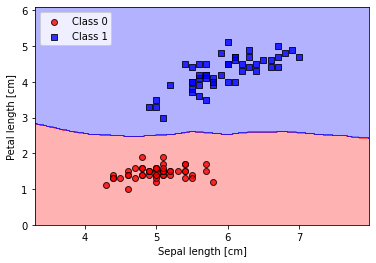

In [92]:
# il plot del DB
plot_decision_regions(X, y, classifier=knn_classifier)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_08.png', dpi=300)
plt.show()  # --> DB non-lineare

[Plot di due feature di iris (con matplotlib) usando 4 differenti classificatori: output e codice python](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html)

## Tipi di classificazione

![Multi Class & Multi Output](images_knn/MultiClassMultiOutput.png) 

[Maggiori info su MC & MO in scikit-learn](https://scikit-learn.org/stable/modules/multiclass.html)

## Grafici
Nel corso useremo prevalentemente la grafica di pandas.

La libreria di Data Visualization più vecchia è 'matplotlib'. E' anche la più flessibile. <br>

Sulla differenza tra il modulo *pylab* ed il modulo *pyplot*, entrambi di matplotlib, vedi [qui](https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot).<br>
[Ed anche qui](https://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these): --> l'uso di pylab è ora <u>scoraggiato</u>.

Diverse librerie costruiscono un wrapper sopra di esse, ad es. pandas e seaborn. 

seaborn ha le heatmap, utili per visualizzare le correlazioni ed i missing values.

Una buona conoscenza di matplotlib permette un controllo più fine del plot finale, ma è oltre lo scopo del corso.

Un'alternativa ancora è ggplot, costruita sulla "grammatica della grafica" di Leland Wilkinson.



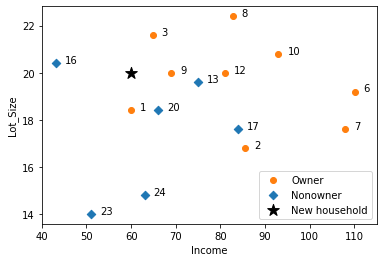

In [86]:
# il grafico iris con matplotlib (senza commento codice):

fig, ax = plt.subplots()

subset = trainData.loc[trainData['Ownership']=='Owner']
ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner', color='C1')

subset = trainData.loc[trainData['Ownership']=='Nonowner']
ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner', color='C0')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label
for _, row in trainData.iterrows():
    ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

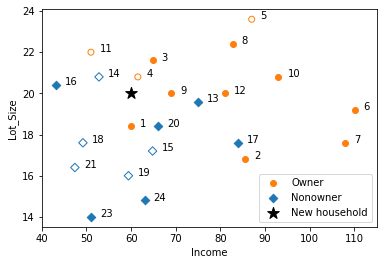

In [87]:
def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner' if showLabel else None, color='C1', **kwargs)

    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner' if showLabel else None, color='C0', **kwargs)

    plt.xlabel('Income')  # set x-axis label
    plt.ylabel('Lot_Size')  # set y-axis label
    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))

fig, ax = plt.subplots()

plotDataset(ax, trainData)
plotDataset(ax, validData, showLabel=False, facecolors='none')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

In [88]:
# come ingrandire questo plot? (so 36367986)

# fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') # non funziona

# in modo permanentem (FUNZIONA):
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Campionamento

In [89]:
mower_df.sample(5,random_state=1)

,Income,Lot_Size,Ownership,Number
13,52.8,20.8,Nonowner,14
18,59.4,16.0,Nonowner,19
3,61.5,20.8,Owner,4
14,64.8,17.2,Nonowner,15
20,47.4,16.4,Nonowner,21


In [90]:
# Regole pratiche?! (DMforBA, p. 29)
# 10 righe per ogni predittore;
# per classificazione: 6 * m * p (m= numero delle etichette della classe, p = numero delle feature)